In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
    rng = np.random.default_rng(seed)
    hours_studied = rng.normal(5, 2, n).clip(1, 10)
    marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
    gender = rng.choice(['Male', 'Female'], n)
    subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
    study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
    attempts = rng.integers(1, 4, n)
    return pd.DataFrame({
        'hours_studied': hours_studied.round(2),
        'marks': marks.round(2),
        'gender': gender,
        'subject': subject,
        'study_method': study_method,
        'attempts': attempts
    })

def generate_daily_sales(n=60, seed=42):
    rng = np.random.default_rng(seed)
    base = pd.date_range(start='2024-01-01', periods=n, freq='D')
    trend = np.linspace(50, 80, n)
    season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
    noise = rng.normal(0, 3, n)
    sales = (trend + season + noise).round(2)
    return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
# students = generate_students(220)
# sales = generate_daily_sales(90)

## **Problems**
1. Using sales, draw a lineplot of date vs sales.
2. From students, plot hours_studied vs marks and color by gender.
3. Create a grid of scatterplots (hours_studied vs marks) faceted by subject.
4. Plot a histogram of marks with a KDE overlay.
5. Show the KDE curve for hours_studied.
6. Display the count of records per subject.
7. Draw a regression line for hours_studied and marks.
8. Create a pairplot and a jointplot for students' dataset.
9. Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.
10. Draw a line chart of sales over date and a histogram of marks using Plotly.

In [9]:
sales = generate_daily_sales(90)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    90 non-null     datetime64[ns]
 1   sales   90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [10]:
sales['day']=sales['date'].dt.day

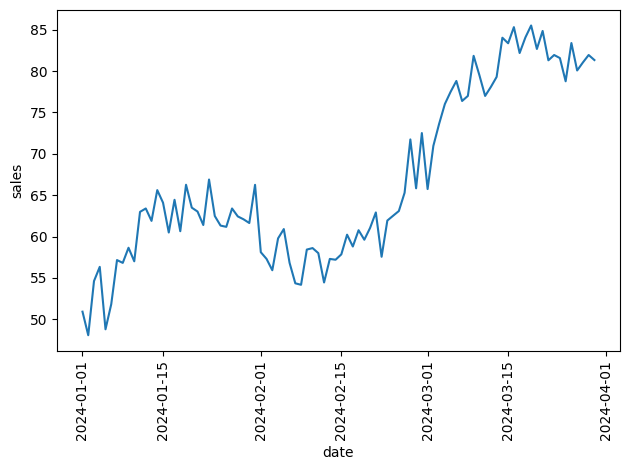

In [16]:
sns.lineplot(x=sales['date'], y=sales['sales'])
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

In [17]:
students = generate_students(220)
students

,hours_studied,marks,gender,subject,study_method,attempts
0,5.61,54.04,Male,English,Solo,2
1,2.92,30.00,Female,Science,Solo,2
2,6.50,70.46,Female,History,Group,3
3,6.88,52.76,Female,English,Group,3
4,1.10,30.00,Female,History,Solo,1
...,...,...,...,...,...,...
215,7.01,70.66,Female,English,Solo,1
216,6.08,67.32,Male,Math,Group,2
217,7.67,65.64,Male,Science,Solo,1
218,4.69,41.90,Male,Math,Solo,1


<Axes: xlabel='hours_studied', ylabel='marks'>

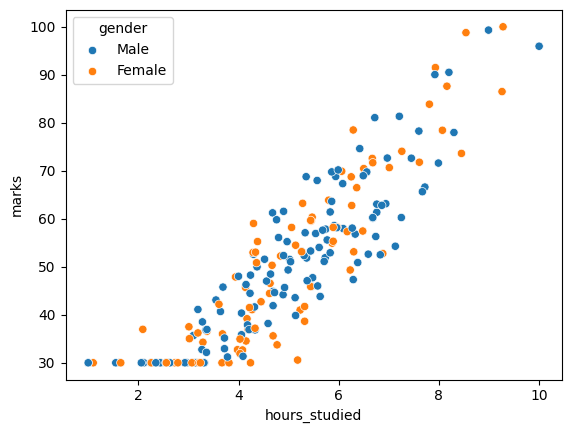

In [18]:
sns.scatterplot(x=students['hours_studied'], y= students['marks'], hue=students['gender'])

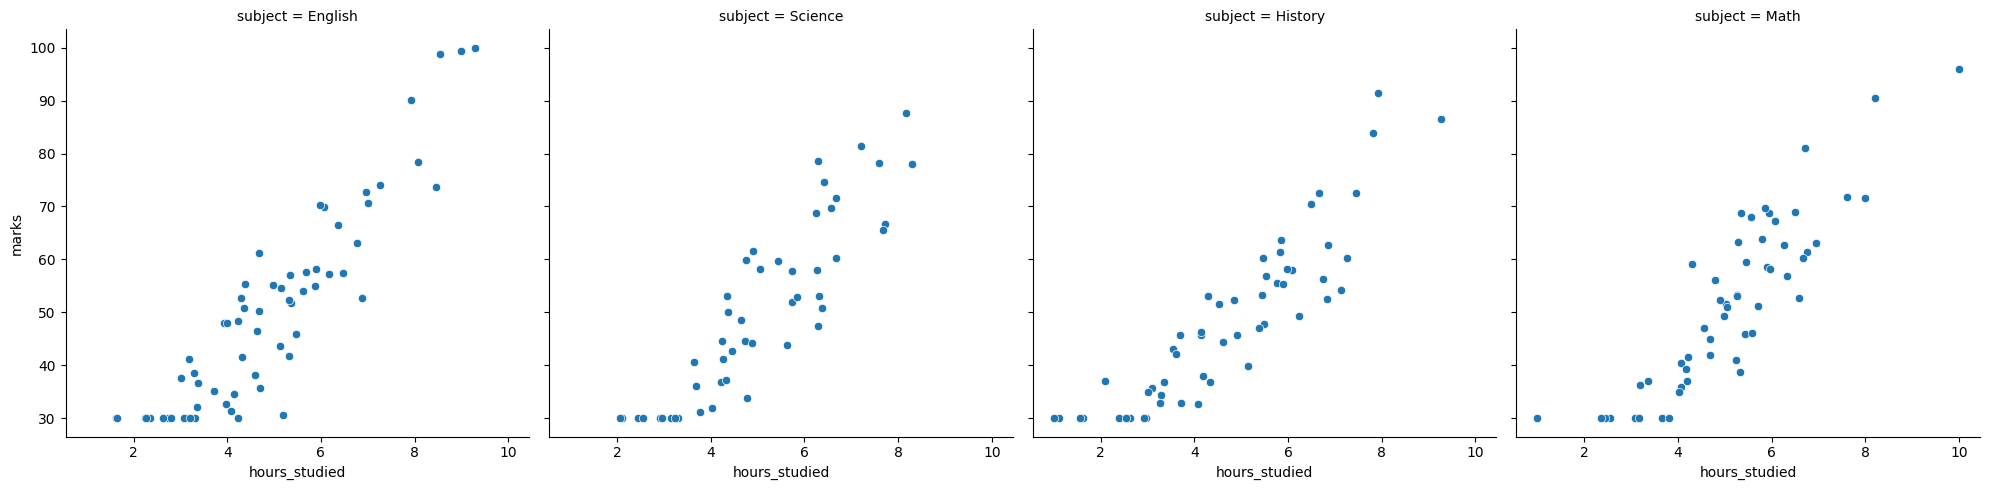

In [20]:
sns.relplot(kind='scatter',data=students, x='hours_studied',y='marks',col='subject')

<Axes: xlabel='marks', ylabel='Count'>

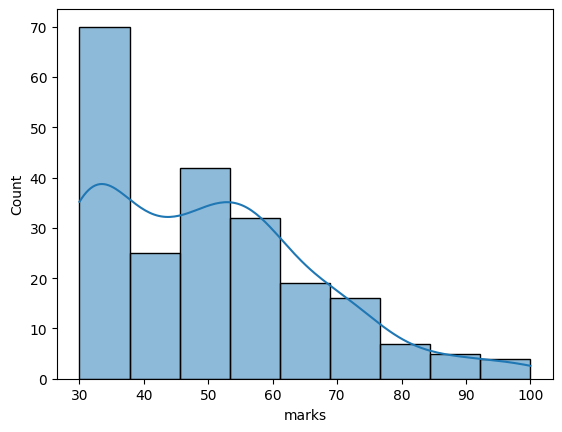

In [21]:
sns.histplot(data=students, x='marks',kde=True)

<Axes: xlabel='marks', ylabel='Density'>

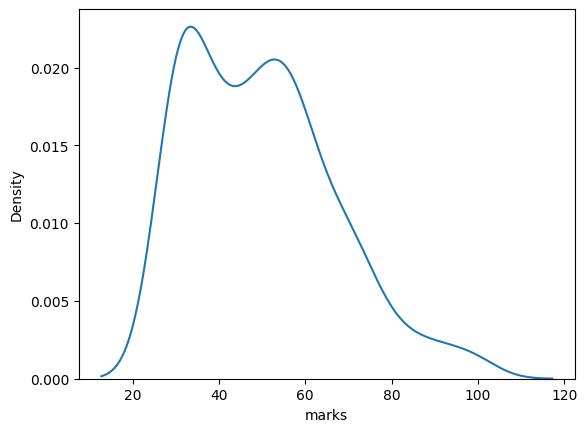

In [22]:
sns.kdeplot(data=students, x='marks')

<Axes: xlabel='subject', ylabel='count'>

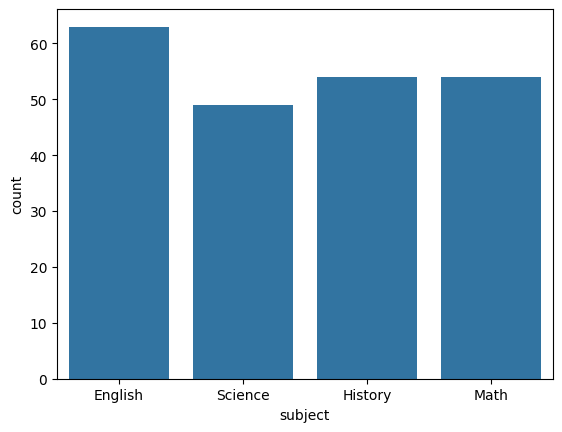

In [23]:
sns.countplot(data=students,x='subject')

<Axes: xlabel='hours_studied', ylabel='marks'>

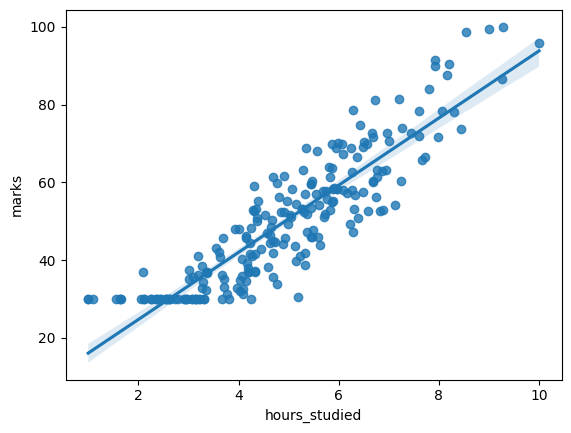

In [24]:
sns.regplot(data=students, x='hours_studied',y='marks')

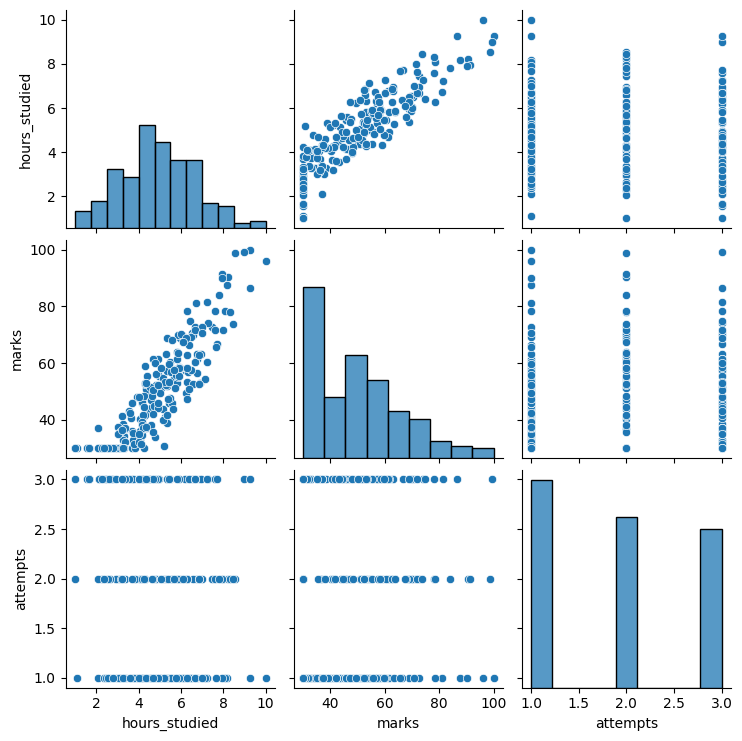

In [25]:
sns.pairplot(data=students)

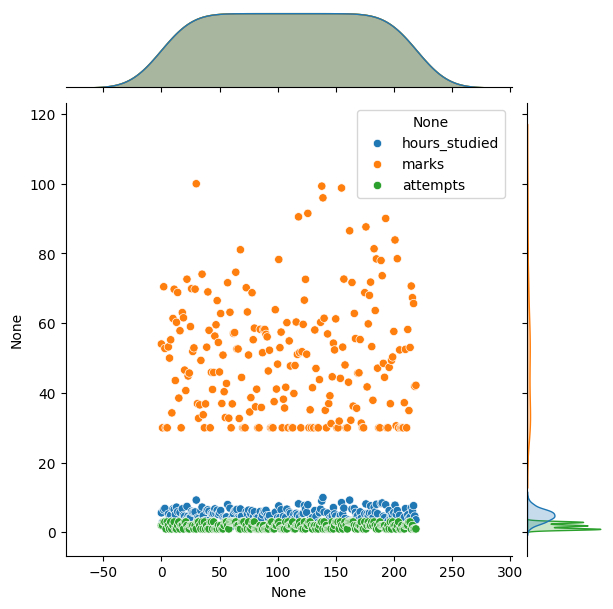

In [26]:
sns.jointplot(data=students)

In [29]:
fig = px.scatter(data_frame=students, x='hours_studied', y='marks', color='gender')
fig.show()

In [31]:
fig = px.line(data_frame=sales, x='sales', y='date')
fig.show()

In [34]:
fig = px.histogram(data_frame=students,x='marks')
fig.update_traces(
    marker_line_width=3,       
    marker_line_color='black'  
)
fig.show()